# Objective:
Using Data Science tools for conducting a preliminary prognosis of Hypertension/hypotension, based on **the level of hemoglobin and genetic history of the individual**.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("Training Data - Classification of Patients with Abnormal Blood Pressure ....csv")

In [3]:
data.head(100)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,12.00,0.11,53,41,1,NaN,0,43882,36117,382.0,2,0,0
96,97,0,11.53,0.44,64,21,0,NaN,1,4212,16159,158.0,2,0,0
97,98,1,8.70,0.62,63,13,1,NaN,0,40317,49700,253.0,1,0,1
98,99,1,9.73,0.14,56,34,0,NaN,1,22275,25811,471.0,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

<p> Data is mostly clean with all of the features having *int* or *float* type, with no object type data </p></br>
<p>**Genetic_Pedigree_Coefficient** and **alcohol_consumption_per_day** have some missing values.</p> </n>
Whereas, **pregnancy** feature has very large missing values. Which is the innate nature of the data as all of the patients can't be pregnant women. Because pregnancy data is given only for mostly female patient where Sex = 1.

In [5]:
data.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [6]:
data.shape
#15 features and 2000 entries in the rows

(2000, 15)

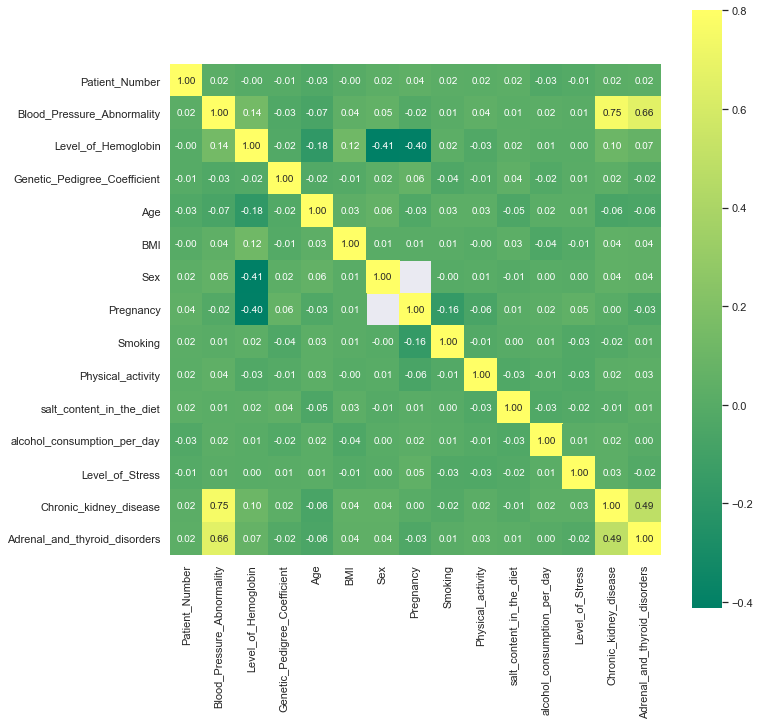

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='summer' );
#No significant correlated features found all are below 0.5

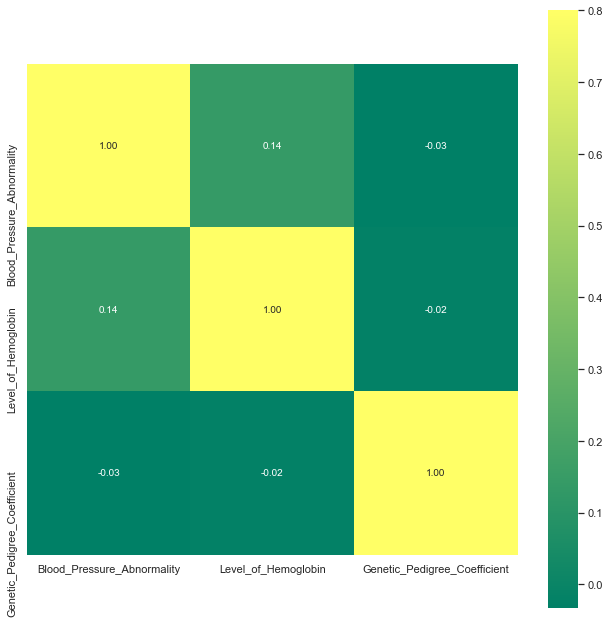

In [8]:
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data.iloc[:,1:4].corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='summer' );
#No significant correlated features found

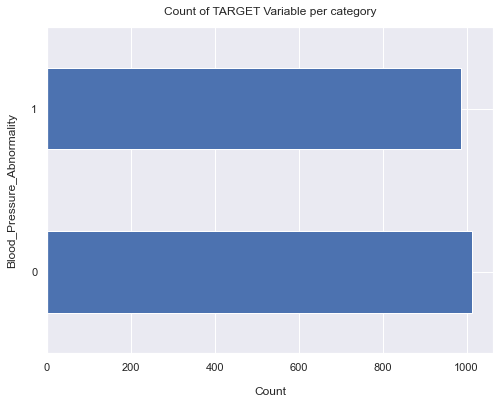

In [9]:
data['Blood_Pressure_Abnormality'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Blood_Pressure_Abnormality", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

According to above graph the data is nearly balanced.

In [10]:
data['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

Initially we only need to perform classification using only two features: *Level_of_Hemoglobin* and *Genetic_Pedigree_Coefficient*

# Missing value treatment

In [11]:
data.isnull().any(axis=0)

Patient_Number                   False
Blood_Pressure_Abnormality       False
Level_of_Hemoglobin              False
Genetic_Pedigree_Coefficient      True
Age                              False
BMI                              False
Sex                              False
Pregnancy                         True
Smoking                          False
Physical_activity                False
salt_content_in_the_diet         False
alcohol_consumption_per_day       True
Level_of_Stress                  False
Chronic_kidney_disease           False
Adrenal_and_thyroid_disorders    False
dtype: bool

In [12]:
data['Genetic_Pedigree_Coefficient'].isnull().value_counts()


False    1908
True       92
Name: Genetic_Pedigree_Coefficient, dtype: int64

There are minimal no. of missing values so we can fill them with simple imputation with median

In [13]:
#median imputation
median = data['Genetic_Pedigree_Coefficient'].median()
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(median)

In [14]:
#checking for hidden missing values
print("# rows in dataframe {0}".format(len(data)))
print("# rows missing in Level_of_Hemoglobin: {0}".format(data['Level_of_Hemoglobin'].isnull().sum()))
print("# rows missing in Genetic_Pedigree_Coefficient: {0}".format(data['Genetic_Pedigree_Coefficient'].isnull().sum()))

# rows in dataframe 2000
# rows missing in Level_of_Hemoglobin: 0
# rows missing in Genetic_Pedigree_Coefficient: 0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


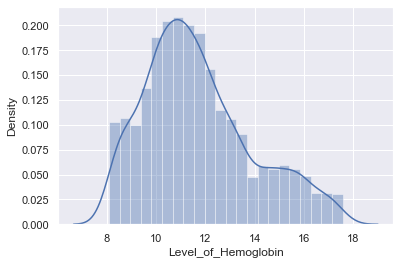

In [15]:
sns.distplot(data['Level_of_Hemoglobin']);

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


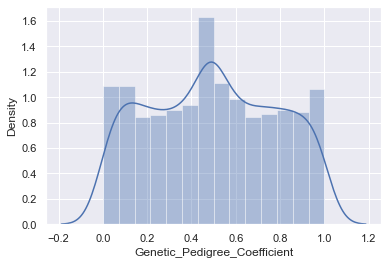

In [16]:
sns.distplot(data['Genetic_Pedigree_Coefficient']);

# Outliers Visualization for all features

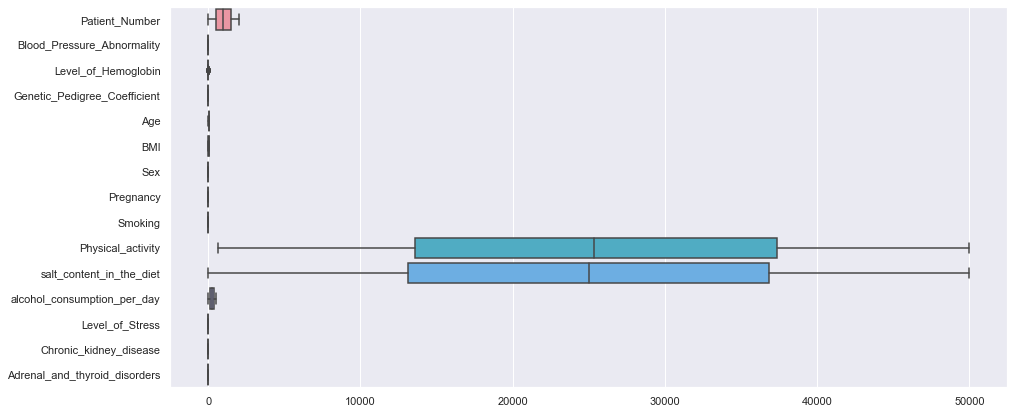

In [17]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=data, orient='h');

There are no outliers.

# Spliting the data

In [18]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']
predicted_class_names = ['Blood_Pressure_Abnormality']
X= data[feature_col_names].values
y= data[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
#check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

70.00% in training set
30.00% in test set


In [20]:
#Verifying predicted value was split correctly

print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['Blood_Pressure_Abnormality'] == 1]), (len(data.loc[data['Blood_Pressure_Abnormality'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['Blood_Pressure_Abnormality'] == 0]), (len(data.loc[data['Blood_Pressure_Abnormality'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 987 (49.35%)
Original False : 1013 (50.65%)

Training True  : 707 (50.50%)
Training False : 693 (49.50%)

Test True      : 280 (46.67%)
Test False     : 320 (53.33%)


In [21]:
#Training the model
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [22]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy on Training data: 0.8429



In [23]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# Accuracy
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy on Test data: 0.8583



In [24]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[278  42]
 [ 43 237]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       320
           1       0.85      0.85      0.85       280

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(n_estimators=10, random_state=42)

In [69]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9971


In [70]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.9600


***Hyperparameter tuning with Cross validation ***

*Getting the best from Random Forest*

In [78]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30, 100]})

In [79]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=110, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=10)

In [80]:
rf_model = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=110, max_features='auto',
            min_samples_leaf=5, min_samples_split=12,n_estimators=10)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)

print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9736


In [81]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.9633


In [82]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )

[[313   7]
 [ 15 265]]


In [83]:
import joblib

In [84]:
# save the model to disk
filename = 'final_rf_model.sav'
joblib.dump(rf_model, filename)


['final_rf_model.sav']

# Now considering other variables too

We should explore the features with Factor Analysis to arrive on other underlying driving factors other than *Level_of_Hemoglobin* and *Genetic_Pedigree_Coefficient*. But all the featues are mostly independent of each other, so there is less scope for Dimesionality Reduction.

Hence, we can go with all of them.

Mising value treatment in alcohol_consumption_per_day

In [34]:
data['alcohol_consumption_per_day'].isnull().value_counts()

False    1758
True      242
Name: alcohol_consumption_per_day, dtype: int64

In [35]:
data[data['alcohol_consumption_per_day'] < 10]['alcohol_consumption_per_day'].count()

38

There are significant no. of missing values in *alcohol_consumption_per_day*, we could use more sophisticated technique for missing value treatment

like **Imputation with predictive modelling** here. But as we look back to our **Correlation heat map chart** it has values ranging only from -0.04 to 0.02 with all of the features, which is very low (ie. close to 'no relationship') to leverage them, as to use them as predictors for missing values.

In [36]:
data[data['alcohol_consumption_per_day'] <0]['alcohol_consumption_per_day'].count()

0

In [37]:
# as there are no negative values we can safely Replace NaN values with -1 for facilitating the visualization
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(-1)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


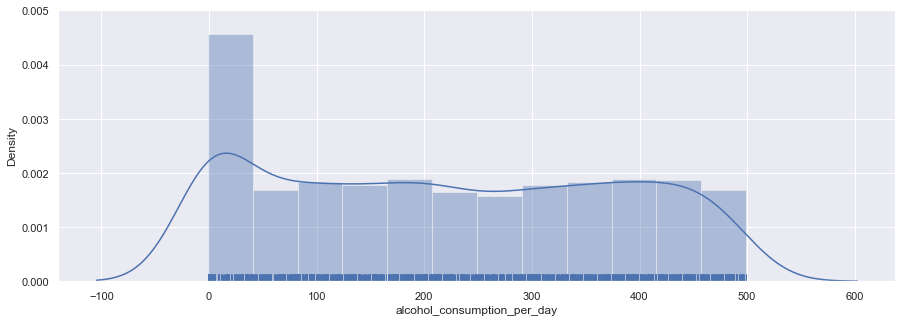

In [38]:
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(data['alcohol_consumption_per_day'],rug=True);

Distribution is mostly uniformly distributed except near 0 which are mostly the missing values (-1)

In [39]:
#changing back to original data
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].replace(-1,np.nan)
print("Median: {:.2f}".format(data['alcohol_consumption_per_day'].median()))
print("Mean: {:.2f}".format(data['alcohol_consumption_per_day'].mean()))

Median: 250.00
Mean: 251.01


Hence, it is safe to perform median Imputation

In [41]:
median = data['alcohol_consumption_per_day'].median()
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(median)

# Checking the pairwise relationship of non-categorical features#

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


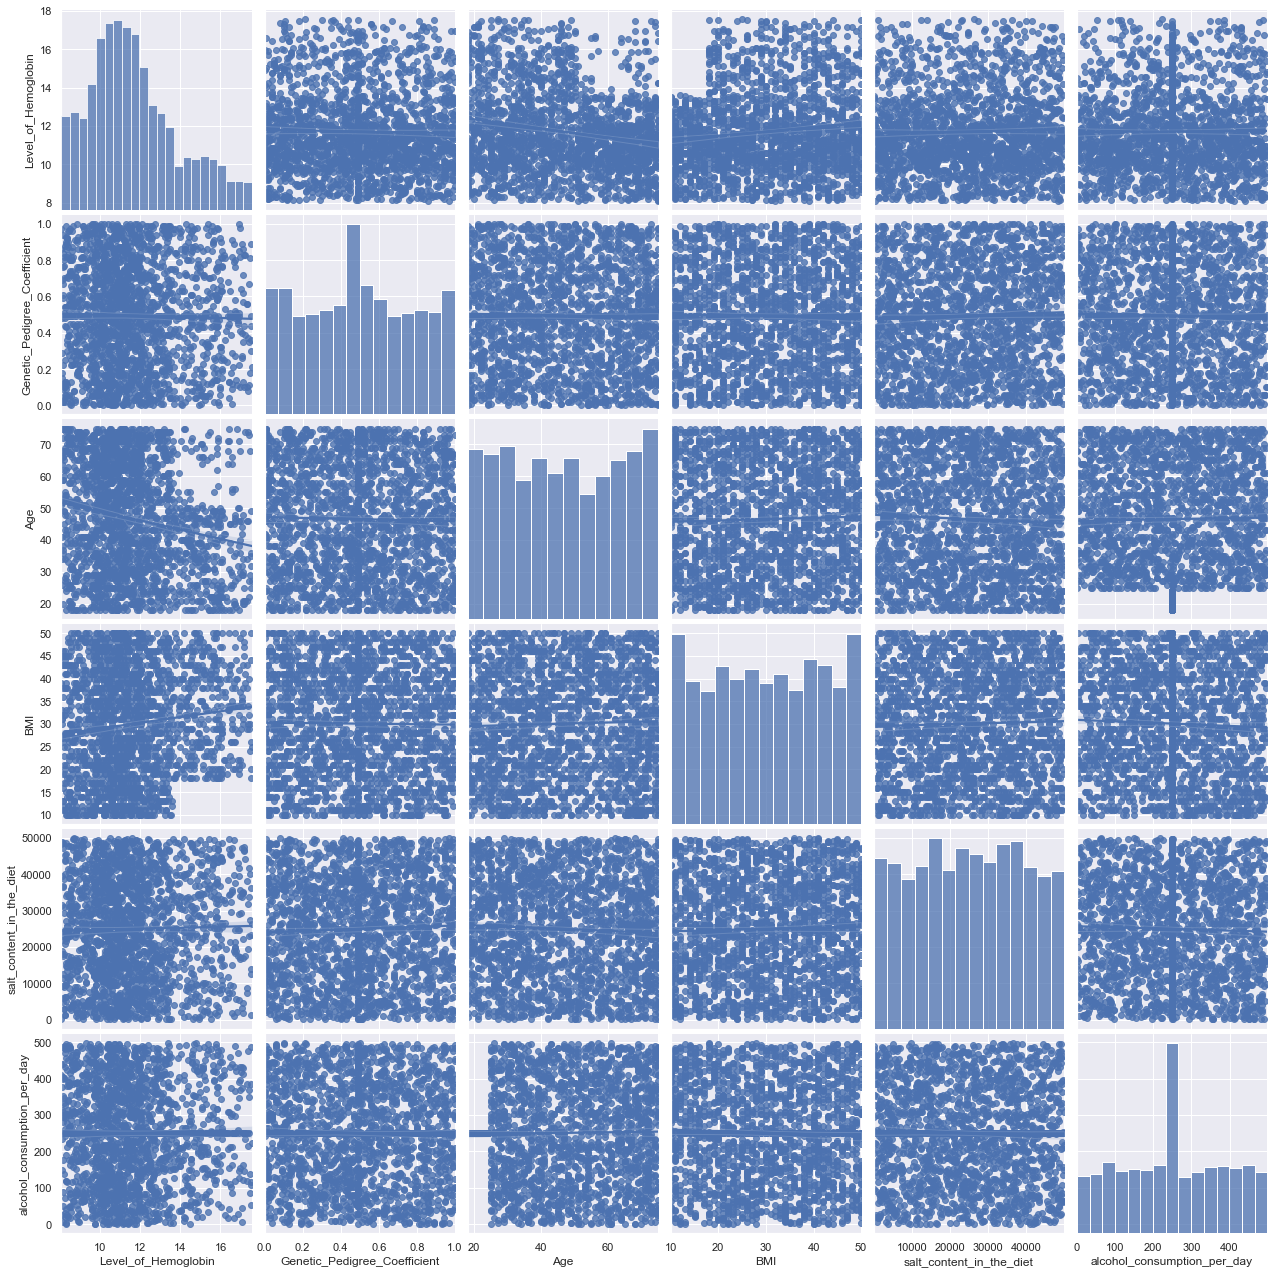

In [42]:
sns.pairplot(data, size=3,
             vars=['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','BMI',
                  'salt_content_in_the_diet','alcohol_consumption_per_day'] ,kind="reg");

# Mising value treatment in Pregnancy

Missing value in df for male patients with (sex=0) is well justified.

In [43]:
print("Male Patient: {}".format(data[data["Sex"]== 0]['Sex'].count()))
print("Female Patient: {}".format(data[data["Sex"]== 1]['Sex'].count()))

Male Patient: 1008
Female Patient: 992


In [44]:
data[data["Sex"]== 1]['Pregnancy'].isnull().value_counts()

True     550
False    442
Name: Pregnancy, dtype: int64

There are 550 missing values among female patients and we can safely replace 1008 pregnancy value of male pateints to 0

In [45]:
data[data["Sex"]== 0]['Pregnancy'].isnull().value_counts()

True    1008
Name: Pregnancy, dtype: int64

In [46]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day         0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [47]:
data.fillna(0, inplace=True)

In [48]:
data.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [49]:
data["Pregnancy"].isnull().value_counts()

False    2000
Name: Pregnancy, dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      2000 non-null   float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    2000 non-null   float64
 12  Level_of_Stress                2000 non-null   i

# Now we can appply classification models

In [51]:
feature_col_names = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient','Age','BMI','Sex','Pregnancy','Smoking',
                     'Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day','Level_of_Stress',
                    'Chronic_kidney_disease','Adrenal_and_thyroid_disorders']
predicted_class_names = ['Blood_Pressure_Abnormality']
X= data[feature_col_names].values
y= data[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
nb1_model = GaussianNB()

nb1_model.fit(X_train, y_train.ravel())

GaussianNB()

In [52]:
nb1_predict_train = nb1_model.predict(X_train)

# Accuracy
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb1_predict_train)))
print()

Accuracy on Training data: 0.9521



In [54]:
nb1_predict_test = nb1_model.predict(X_test)

# Accuracy
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb1_predict_test)))
print()

Accuracy on Test data: 0.9583



In [55]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb1_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb1_predict_test))

Confusion Matrix
[[316   4]
 [ 21 259]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       320
           1       0.98      0.93      0.95       280

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



# Training Random Forest

In [57]:
params = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
rf1_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30, 100]})

In [58]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=30)

In [59]:
rf1_model = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=90, max_features='auto',
            min_samples_leaf=3, min_samples_split=8,n_estimators=30)
rf1_model.fit(X_train, y_train.ravel())
rf1_predict_train = rf1_model.predict(X_train)

print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf1_predict_train)))

Accuracy on Training data: 0.9821


In [60]:
rf1_predict_test = rf1_model.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf1_predict_test)))

Accuracy on Test data: 0.9683


In [61]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf1_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf1_predict_test))

Confusion Matrix
[[313   7]
 [ 12 268]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       320
           1       0.97      0.96      0.97       280

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [62]:
filename = 'randomf1_model.sav'
joblib.dump(rf1_model, filename)

['randomf1_model.sav']